# Adaptive Signal POD using Kriging

In [1]:
# import relevant module
import openturns as ot
import otpod
# enable display figure in notebook
%matplotlib inline
import numpy as np

## Generate data

In [2]:
inputSample = ot.NumericalSample(
    [[4.59626812e+00, 7.46143339e-02, 1.02231538e+00, 8.60042277e+01],
    [4.14315790e+00, 4.20801346e-02, 1.05874908e+00, 2.65757364e+01],
    [4.76735111e+00, 3.72414824e-02, 1.05730385e+00, 5.76058433e+01],
    [4.82811977e+00, 2.49997658e-02, 1.06954641e+00, 2.54461380e+01],
    [4.48961094e+00, 3.74562922e-02, 1.04943946e+00, 6.19483646e+00],
    [5.05605334e+00, 4.87599783e-02, 1.06520409e+00, 3.39024904e+00],
    [5.69679328e+00, 7.74915877e-02, 1.04099514e+00, 6.50990466e+01],
    [5.10193991e+00, 4.35520544e-02, 1.02502536e+00, 5.51492592e+01],
    [4.04791970e+00, 2.38565932e-02, 1.01906882e+00, 2.07875350e+01],
    [4.66238956e+00, 5.49901237e-02, 1.02427200e+00, 1.45661275e+01],
    [4.86634219e+00, 6.04693570e-02, 1.08199374e+00, 1.05104730e+00],
    [4.13519347e+00, 4.45225831e-02, 1.01900124e+00, 5.10117047e+01],
    [4.92541940e+00, 7.87692335e-02, 9.91868726e-01, 8.32302238e+01],
    [4.70722074e+00, 6.51799251e-02, 1.10608515e+00, 3.30181002e+01],
    [4.29040932e+00, 1.75426222e-02, 9.75678838e-01, 2.28186756e+01],
    [4.89291400e+00, 2.34997929e-02, 1.07669835e+00, 5.38926138e+01],
    [4.44653744e+00, 7.63175936e-02, 1.06979154e+00, 5.19109415e+01],
    [3.99977452e+00, 5.80430585e-02, 1.01850716e+00, 7.61988190e+01],
    [3.95491570e+00, 1.09302814e-02, 1.03687664e+00, 6.09981789e+01],
    [5.16424368e+00, 2.69026464e-02, 1.06673711e+00, 2.88708887e+01],
    [5.30491620e+00, 4.53802273e-02, 1.06254792e+00, 3.03856837e+01],
    [4.92809155e+00, 1.20616369e-02, 1.00700410e+00, 7.02512744e+00],
    [4.68373805e+00, 6.26028935e-02, 1.05152117e+00, 4.81271603e+01],
    [5.32381954e+00, 4.33013582e-02, 9.90522007e-01, 6.56015973e+01],
    [4.35455857e+00, 1.23814619e-02, 1.01810539e+00, 1.10769534e+01]])

signals = ot.NumericalSample(
    [[ 37.305445], [ 35.466919], [ 43.187991], [ 45.305165], [ 40.121222], [ 44.609524],
     [ 45.14552 ], [ 44.80595 ], [ 35.414039], [ 39.851778], [ 42.046049], [ 34.73469 ],
     [ 39.339349], [ 40.384559], [ 38.718623], [ 46.189709], [ 36.155737], [ 31.768369],
     [ 35.384313], [ 47.914584], [ 46.758537], [ 46.564428], [ 39.698493], [ 45.636588],
     [ 40.643948]])

# Select point as initial DOE
inputDOE = inputSample[:7]
outputDOE = signals[:7]

# simulate the true physical model
basis = ot.ConstantBasisFactory(4).build()
covModel = ot.SquaredExponential(4)
krigingModel = ot.KrigingAlgorithm(inputSample, signals, basis, covModel)
TNC = ot.TNC()
TNC.setBoundConstraints(ot.Interval([0.001], [100]))
krigingModel.setOptimizer(TNC)
krigingModel.run()
physicalModel = krigingModel.getResult().getMetaModel()

## Create the Adaptive Signal POD with Kriging model

This method aims at improve the quality of the Kriging model where the 
accuracy of the computed POD is the lowest.

As this method is time consuming, it is more efficient to reduce the
area of the defect size only in the most interesting part. To do that,
an initial POD study can be run.

#### Run an initial POD study with the kriging technique

In [3]:
detection = 38.
initialPOD = otpod.KrigingPOD(inputDOE, outputDOE, detection)
initialPOD.run()

Start optimizing covariance model parameters...
Kriging optimizer completed
kriging validation Q2 (>0.9): 0.9425
Computing POD per defect: [==================================================] 100.00% Done


/home/dumas/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


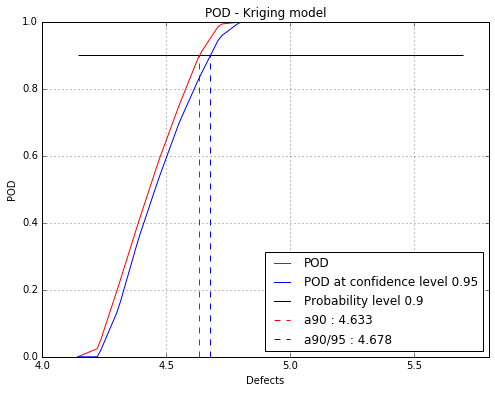

In [4]:
fig, ax = initialPOD.drawPOD(0.9, 0.95)
fig.show()

Based on this study, the interesting part for the defects ranges from 4.2 to 4.8. The adaptive signal algorithm will be then reduced to this area.
#### Run the adaptive algorithm

Iteration : 1/2
Optimization of the covariance model parameters...
Kriging validation Q2 (>0.9): 0.9425
Computing criterion: [==================================================] 100.00% Done
Criterion value : 0.0353
Added point : [4.59539,0.0397476,1.02806,13.4042]



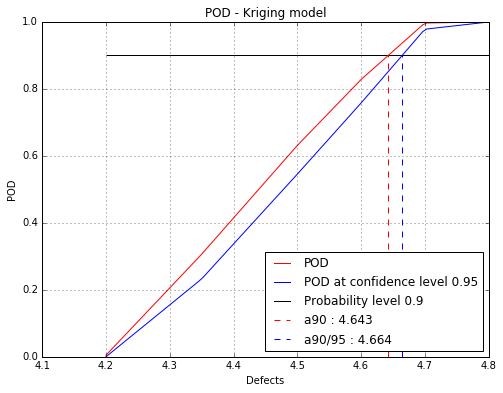

Iteration : 2/2
Kriging validation Q2 (>0.9): 0.9689
Computing criterion: [==================================================] 100.00% Done
Criterion value : 0.0440
Added point : [4.47976,0.0764627,1.03181,74.7687]



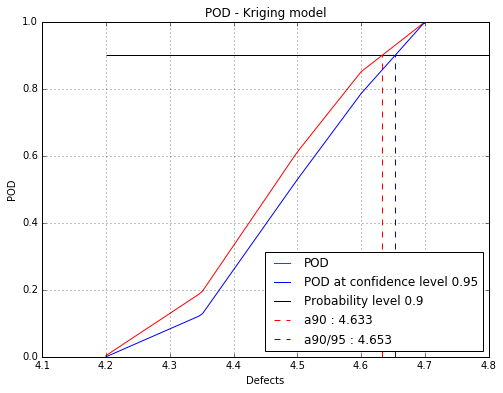

CPU times: user 26.4 s, sys: 4.42 s, total: 30.9 s
Wall time: 10.5 s


In [ ]:
detection = 38
# set the number of iterations
nIteration = 2

# Creating the adaptivePOD object
adaptivePOD = otpod.AdaptiveSignalPOD(inputDOE, outputDOE, physicalModel, nIteration, detection)

# Change the range for the defect sizes between 4.2 and 4.8
adaptivePOD.setDefectSizes([4.2, 4.35, 4.5, 4.6, 4.7, 4.8])

# We can change also the number candidate points for which the critertion is computed
adaptivePOD.setCandidateSize(50)
# we can change the sample size of the Monte Carlo simulation
adaptivePOD.setSamplingSize(100) # default is 5000
# we can also change the size of the simulation to compute the confidence interval
adaptivePOD.setSimulationSize(20) # default is 1000

# The current iteration POD graph can be displayed
# with or without the confidence level curve 
# and with or without the intersection value at the given probability level
# Default is not activated and without probability level nor confidence level.
adaptivePOD.setGraphActive(graphVerbose=True, probabilityLevel=0.9, confidenceLevel=0.95)
%time adaptivePOD.run()

In [ ]:
kr = adaptivePOD.getKrigingResult()
inputfinal = adaptivePOD.getInputDOE()
outputfinal = adaptivePOD.getOutputDOE()
finalPOD = otpod.KrigingPOD(inputfinal, outputfinal, detection)
finalPOD.setKrigingResult(kr)
finalPOD.run()

kriging validation Q2 (>0.9): 0.9915
Computing POD per defect: [=============================================-----] 90.00% 

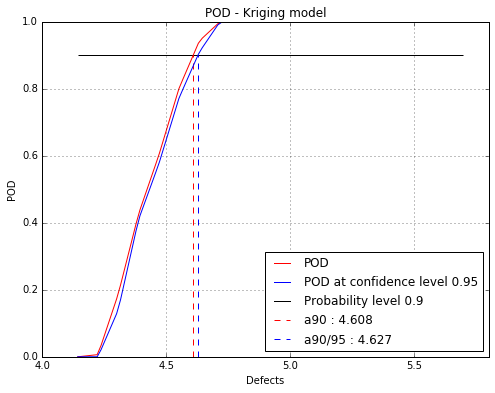

In [6]:
fig, ax = finalPOD.drawPOD(0.9, 0.95)
fig.show()

## Compute the Q2
Enable to check the quality of the model.

In [10]:
print 'Q2 : {:0.4f}'.format(adaptivePOD.getQ2())

Q2 : 0.9844


### Draw the validation graph
The predictions are the one computed by leave one out.

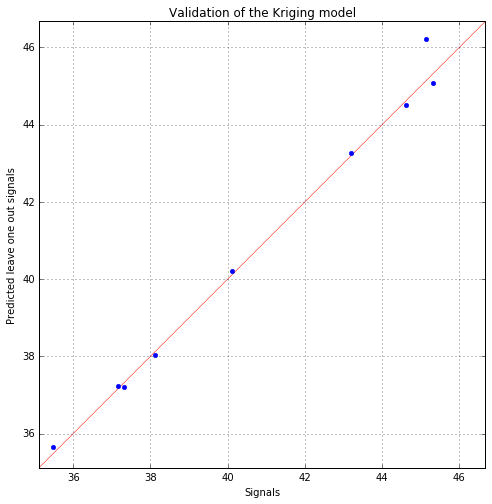

In [11]:
fig, ax = adaptivePOD.drawValidationGraph()
fig.show()

## Compute detection size

In [12]:
# Detection size at probability level 0.9 and confidence level 0.95
print 'Initial POD : ', initialPOD.computeDetectionSize(0.9, 0.95)
print 'After 5 added points : ', adaptivePOD.computeDetectionSize(0.9, 0.95)

Initial POD :  [a90 : 4.63276, a90/95 : 4.67841]
After 5 added points : 

AttributeError: 'AdaptiveSignalPOD' object has no attribute '_PODmodel'

## Show POD graphs
### Mean POD and POD at confidence level with the detection size for a given probability level

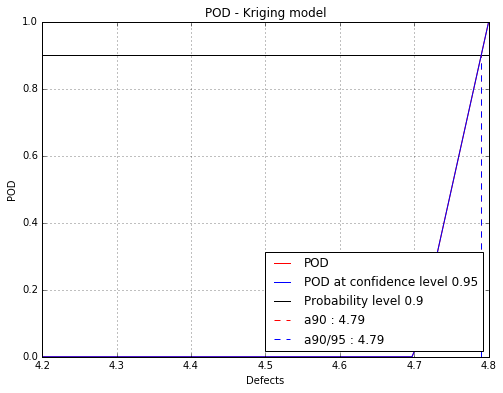

In [9]:
fig, ax = adaptivePOD.drawPOD(probabilityLevel=0.9, confidenceLevel=0.95,
                      name='figure/PODKriging.png')
# The figure is saved in PODPolyChaos.png
fig.show()